In [31]:
import igraph as ig
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random
import csv
from scipy.spatial import Delaunay

In [2]:
#read file 
file = pd.read_csv("los_angeles-censustracts-2019-4-All-MonthlyAggregate.csv", index_col = None, header = 0)


# Needs for a tunnel or highway

In [4]:
with open('los_angeles_censustracts.json') as json_data:
    table=json.load(json_data)
features=table['features']

In [5]:
location_dict={}
for feature in features:
    info={}
    display_name=feature['properties']['DISPLAY_NAME']
    movement_id=feature['properties']['MOVEMENT_ID']
    coord_list=feature['geometry']['coordinates'][0]
    info['display_name']=display_name
    if len(coord_list[0])!=2:#outlier
        mean_coord = np.mean(np.array(coord_list[0]),axis =0 )
    else:
        mean_coord=np.mean(np.array(coord_list),axis=0)
    location_dict[movement_id]=info
    info['mean_coord']=mean_coord


In [6]:
print(location_dict)

{'1': {'display_name': 'Census Tract 480302', 'mean_coord': array([-118.12053321,   34.10309557])}, '2': {'display_name': 'Census Tract 480303', 'mean_coord': array([-118.13785063,   34.09645121])}, '3': {'display_name': 'Census Tract 480304', 'mean_coord': array([-118.13138209,   34.09626386])}, '4': {'display_name': 'Census Tract 480400', 'mean_coord': array([-118.13224544,   34.10349303])}, '5': {'display_name': 'Census Tract 480500', 'mean_coord': array([-118.14492317,   34.0986815 ])}, '6': {'display_name': 'Census Tract 480704', 'mean_coord': array([-118.1528085,   34.098628 ])}, '7': {'display_name': 'Census Tract 480802', 'mean_coord': array([-118.15075124,   34.08341963])}, '8': {'display_name': 'Census Tract 480803', 'mean_coord': array([-118.15266639,   34.09029573])}, '9': {'display_name': 'Census Tract 480804', 'mean_coord': array([-118.15023891,   34.09595766])}, '10': {'display_name': 'Census Tract 480901', 'mean_coord': array([-118.14184446,   34.08538654])}, '11': {'di

In [8]:
gcc_sc=np.loadtxt('GCC.txt')
gcc_g={}
for line in gcc_sc:
    location_pair=tuple(np.sort(line[0:2]).astype('int'))
    gcc_g[location_pair]=line[2]

In [29]:
gcc_id=np.concatenate([gcc_sc[:,0],gcc_sc[:,1]])
gcc_id=np.unique(gcc_id).astype('int')
coords=np.zeros((len(gcc_id),2))
for n, location in enumerate(gcc_id):
    coords[n,:]=location_dict[str(location)]['mean_coord']
print(coords)

[[-118.12053321   34.10309557]
 [-118.13785063   34.09645121]
 [-118.13138209   34.09626386]
 ...
 [-118.07835877   33.79620758]
 [-118.08311857   33.78805729]
 [-118.07969634   33.7809931 ]]


In [32]:
tri_g=Delaunay(coords)

In [49]:
def time_edge_threshold_append(g,triangle,gcc,location_dict):

    edge1=tuple(np.sort(triangle[:2]))
    edge2=tuple(np.sort(triangle[0:2]))
    edge3=tuple(np.sort(triangle[1:]))
    time1=get_travel_time(edge1[0],edge1[1],gcc)
    time2=get_travel_time(edge2[0],edge2[1],gcc)
    time3=get_travel_time(edge3[0],edge3[1],gcc)
    
    location1=location_dict[str(edge1[0])]['mean_coord']
    location2=location_dict[str(edge1[1])]['mean_coord']
    p_distance1=69*np.sqrt((location1[0]-location2[0])**2+(location1[1]-location2[1])**2)
    ratio1=time1/p_distance1
    
    location1=location_dict[str(edge2[0])]['mean_coord']
    location2=location_dict[str(edge2[1])]['mean_coord']
    p_distance2=69*np.sqrt((location1[0]-location2[0])**2+(location1[1]-location2[1])**2)
    ratio2=time2/p_distance2
    
    location1=location_dict[str(edge3[0])]['mean_coord']
    location2=location_dict[str(edge3[1])]['mean_coord']
    p_distance3=69*np.sqrt((location1[0]-location2[0])**2+(location1[1]-location2[1])**2)
    ratio3=time3/p_distance3
    
    if edge1 not in g.keys() and time1!=0 and ratio1>300:
        g[edge1]=time1
    if edge2 not in g.keys() and time2!=0 and ratio2>300:
        g[edge2]=time2
    if edge3 not in g.keys() and time3!=0 and ratio3>300:
        g[edge3]=time3
#define get time for road function
def get_travel_time(loc1,loc2,gcc):
    if(loc1,loc2) in gcc.keys():
        return gcc[(loc1,loc2)]
    else:
        return 0

In [50]:
tri_g16={}
for tri_ids in tri_g.simplices:
    triangle=[gcc_id[tri_ids[0]],gcc_id[tri_ids[1]],gcc_id[tri_ids[2]]]
    time_edge_threshold_append(tri_g16,triangle,gcc_g,location_dict)

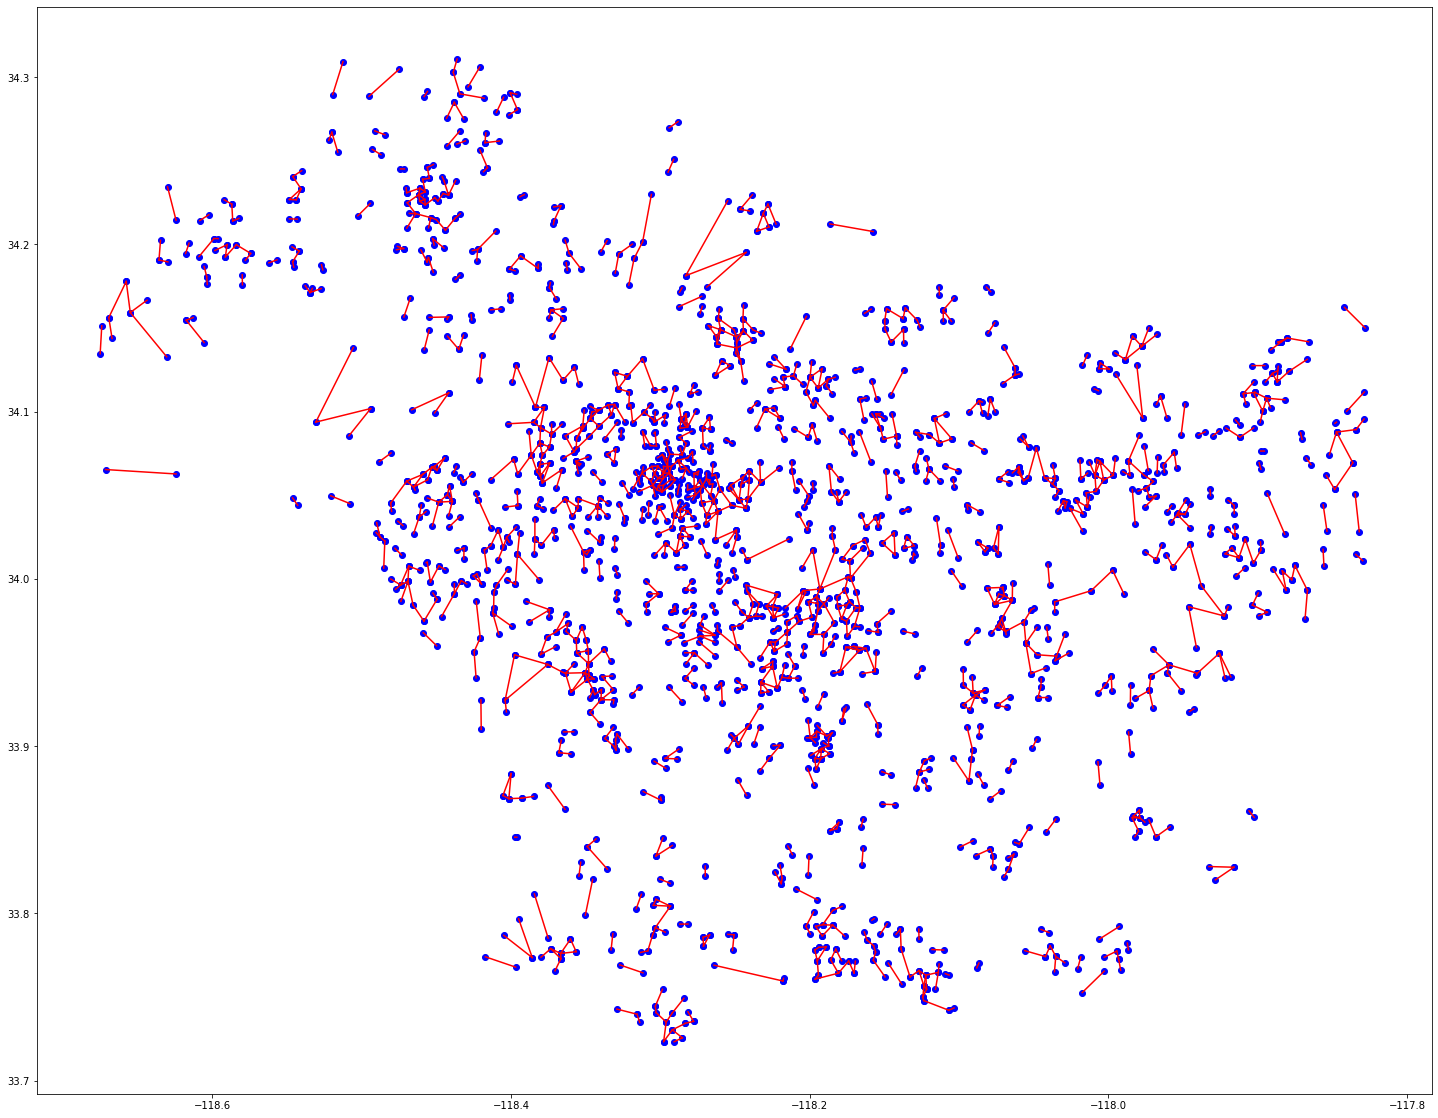

In [51]:
plt.figure(figsize=(25,20))
for i in tri_g16.keys():
    end1=i[0]
    end2=i[1]
    x=[]
    y=[]
    x.append(location_dict[str(end1)]['mean_coord'][0])
    x.append(location_dict[str(end2)]['mean_coord'][0])
    y.append(location_dict[str(end1)]['mean_coord'][1])
    y.append(location_dict[str(end2)]['mean_coord'][1])
    plt.plot(x,y,color='r')
    plt.scatter(x,y,color='b')

In [46]:
def time_edge_threshold_append(g,triangle,gcc,location_dict):

    edge1=tuple(np.sort(triangle[:2]))
    edge2=tuple(np.sort(triangle[0:2]))
    edge3=tuple(np.sort(triangle[1:]))
    time1=get_travel_time(edge1[0],edge1[1],gcc)
    time2=get_travel_time(edge2[0],edge2[1],gcc)
    time3=get_travel_time(edge3[0],edge3[1],gcc)
    
    location1=location_dict[str(edge1[0])]['mean_coord']
    location2=location_dict[str(edge1[1])]['mean_coord']
    p_distance1=69*np.sqrt((location1[0]-location2[0])**2+(location1[1]-location2[1])**2)
    ratio1=time1/p_distance1
    
    location1=location_dict[str(edge2[0])]['mean_coord']
    location2=location_dict[str(edge2[1])]['mean_coord']
    p_distance2=69*np.sqrt((location1[0]-location2[0])**2+(location1[1]-location2[1])**2)
    ratio2=time2/p_distance2
    
    location1=location_dict[str(edge3[0])]['mean_coord']
    location2=location_dict[str(edge3[1])]['mean_coord']
    p_distance3=69*np.sqrt((location1[0]-location2[0])**2+(location1[1]-location2[1])**2)
    ratio3=time3/p_distance3
    
    if edge1 not in g.keys() and time1!=0 and ratio1>300 and p_distance1 > 2:
        g[edge1]=time1
    if edge2 not in g.keys() and time2!=0 and ratio2>300 and p_distance2 > 2:
        g[edge2]=time2
    if edge3 not in g.keys() and time3!=0 and ratio3>300 and p_distance3 > 2:
        g[edge3]=time3
#define get time for road function
def get_travel_time(loc1,loc2,gcc):
    if(loc1,loc2) in gcc.keys():
        return gcc[(loc1,loc2)]
    else:
        return 0

In [47]:
tri_g16={}
for tri_ids in tri_g.simplices:
    triangle=[gcc_id[tri_ids[0]],gcc_id[tri_ids[1]],gcc_id[tri_ids[2]]]
    time_edge_threshold_append(tri_g16,triangle,gcc_g,location_dict)

-118.67145511923503 34.06533878290219 -118.62418590723568 34.06269522170691
-118.67506014705866 34.134544344919796 -118.67397635416673 34.15129022916667
-118.31185060431655 34.20150541726619 -118.3059771739131 34.22977666086955
-118.26783238461539 34.15140651923076 -118.26247707547171 34.14481273584906
-118.65489981553401 34.15918811650484 -118.64366025423728 34.16658369491525
-118.63048660074622 34.1327155932836 -118.65489981553401 34.15918811650484
-118.54625915050165 34.048403046822735 -118.54279579914532 34.043940760683725
-118.4844736779661 34.02258842372881 -118.48520525000004 34.00637404411765
-118.2596385111111 34.148876000000016 -118.26247707547171 34.14481273584906
-118.26783238461539 34.15140651923076 -118.2596385111111 34.148876000000016
-118.24261384313724 34.19509119607843 -118.28301819999999 34.18119773333334
-118.31185060431655 34.20150541726619 -118.3175681884058 34.191494869565204
-117.9770713023256 34.096261674418606 -117.99506612 34.122344479999995
-118.667086413173

-118.35628966666661 33.96319348148148 -118.35596262962964 33.955817370370376
-118.35235936923077 33.97119898461538 -118.35628966666661 33.96319348148148
-118.35628966666661 33.96319348148148 -118.36312744444446 33.968661909090905
-118.34972785526318 33.963745578947375 -118.34822667441858 33.957128069767435
-118.34822667441858 33.957128069767435 -118.35596262962964 33.955817370370376
-118.30951333333334 33.985064190476194 -118.30924580000001 33.980198599999994
-118.29608830000002 33.735139399999994 -118.30284839534882 33.740756116279066
-118.30335228260867 33.744631847826085 -118.30284839534882 33.740756116279066
-118.3155836220473 33.73977706299214 -118.31381698076922 33.73489148076922
-118.3155836220473 33.73977706299214 -118.32915690404035 33.742886512626285
-118.36677813529406 33.77610059411765 -118.36658173858925 33.77297711618259
-118.36677813529406 33.77610059411765 -118.36017696534648 33.784637044554444
-118.36677813529406 33.77610059411765 -118.3563488736843 33.77717550877194
-

-118.32161343103446 33.89857222413793 -118.32909722222223 33.90727518518517
-118.42286639062502 34.002901515625 -118.41971995454546 33.996919227272734
-118.38969852054797 33.986492191780826 -118.3741826 33.98155405
-118.39567351764704 34.014597200000004 -118.39703911403515 33.99670713157895
-118.45605642857143 34.00990171428571 -118.45671641666667 34.009672
-118.37408234615386 34.06926057692308 -118.38037442857141 34.061415571428576
-118.38071993846152 34.068353753846154 -118.37408234615386 34.06926057692308
-118.37902288888888 34.057344111111114 -118.38037442857141 34.061415571428576
-118.3728254857143 34.08651088571428 -118.38020222448976 34.0904282244898
-118.38068395454547 34.08116622727273 -118.38020222448976 34.0904282244898
-118.3728254857143 34.08651088571428 -118.37279252702703 34.092439824324316
-118.3728254857143 34.08651088571428 -118.3657860638298 34.09247795744682
-118.30103718518515 34.043229259259256 -118.30358958333333 34.03485275
-118.30773033333334 34.045583111111114

-118.44837876923076 34.045856230769225 -118.45590854545456 34.048320909090904
-118.46142425000001 34.03704091666667 -118.46521487000004 34.02702613000002
-118.46524368965517 34.054865172413784 -118.4590196666667 34.06245459259259
-118.469784625 34.0584185625 -118.4590196666667 34.06245459259259
-118.45298141860458 34.06672293023255 -118.4590196666667 34.06245459259259
-118.41946311241603 34.133914659396 -118.42117336640472 34.11914462082514
-118.43178114925375 34.14566001492537 -118.43496201658378 34.1371366766169
-118.43420108333335 34.181559666666665 -118.43719650000001 34.1790378125
-118.44179422580643 34.156549451612904 -118.45477266666668 34.15627546666666
-118.44179422580643 34.156549451612904 -118.44280416666666 34.15508183333334
-118.39642050847456 34.127525468926535 -118.39921172786889 34.11739203934423
-118.39642050847456 34.127525468926535 -118.38362230735922 34.102591086580084
-118.361087 34.1945646 -118.36376308333332 34.20245716666667
-118.60840542857143 34.21413257142857

-118.24956953999998 34.13486892000001 -118.24626321917806 34.13025083561643
-118.25318768750003 34.12750386249999 -118.26333093023256 34.121590813953496
-118.30401401863351 34.112706614906834 -118.31193171302432 34.131603664459135
-118.26891329850747 34.037884865671636 -118.26967638983052 34.03277461016949
-118.28673910000002 34.0415884 -118.28306599999999 34.04410723076923
-118.23344275999997 34.06963784 -118.2329243898305 34.05760222033898
-118.22039648571429 34.06649771428572 -118.2329243898305 34.05760222033898
-118.2523297857143 34.04399942857143 -118.26005150000002 34.05355750000001
-118.24437945652174 34.06101028260869 -118.24586860784315 34.05658950980391
-118.24042657142857 34.059093114285716 -118.24586860784315 34.05658950980391
-118.24437945652174 34.06101028260869 -118.24067491111109 34.064746355555556
-118.22107773684215 34.090765236842095 -118.21728772222222 34.0838259074074
-118.2329243898305 34.05760222033898 -118.24139595652174 34.047801434782606
-118.24139595652174 34

-118.44837876923076 34.045856230769225 -118.45259354166666 34.031775875
-118.43416008333328 34.037254749999995 -118.44155396551724 34.03101172413794
-118.469784625 34.0584185625 -118.48051692307693 34.04534580000001
-118.469784625 34.0584185625 -118.46524368965517 34.054865172413784
-118.45999042857144 34.04426842857143 -118.46142425000001 34.03704091666667
-118.43632061290322 34.01698956451613 -118.4314302093023 34.01848911627908
-118.4314302093023 34.01848911627908 -118.4316183 34.01172203333333
-118.45298141860458 34.06672293023255 -118.45589720833338 34.05917564583333
-118.4411587142857 34.055746428571425 -118.44254735294118 34.05030435294117
-118.44257204878052 34.145060008130095 -118.43496201658378 34.1371366766169
-118.40669028 34.16140412 -118.41349972727272 34.16079242424242
-118.42666311764707 34.15791017647059 -118.42633029411766 34.15472529411765
-118.54306799999998 34.2149975 -118.54835004545451 34.215199636363636
-118.54173168749998 34.1959406875 -118.54616730769229 34.18

-118.2501084516129 33.98597293548387 -118.2451015777778 33.979986155555544
-118.23777482758621 33.98501737931035 -118.242009875 33.992903250000005
-118.23777482758621 33.98501737931035 -118.24094738461538 33.976901384615374
-118.20112479120877 34.084724857142874 -118.21058435135133 34.08985702702703
-118.25898947826089 34.130271463768125 -118.25318768750003 34.12750386249999
-118.25898947826089 34.130271463768125 -118.26333093023256 34.121590813953496
-118.22992092537315 34.10141625373134 -118.23558712727272 34.090434872727265
-118.23551090322582 34.105392225806455 -118.24025343199999 34.100977968
-118.21986602564102 34.09590322435895 -118.22992092537315 34.10141625373134
-118.21986602564102 34.09590322435895 -118.22383592039797 34.102305009950236
-118.22992092537315 34.10141625373134 -118.22383592039797 34.102305009950236
-118.26646967346939 34.07985008163265 -118.26706558620688 34.07657255172414
-118.25184176056335 34.080984408450696 -118.25635336585361 34.083255317073174
-118.276384

-118.17866241666667 33.97600933333334 -118.17538363636362 33.974756121212124
-118.17005787999999 33.971645248 -118.16636359999998 33.98261785
-118.16879057894731 33.99212753947367 -118.16636359999998 33.98261785
-118.15518551999999 33.97317713999999 -118.14550396756758 33.98083522162162
-118.15401578846152 33.96805157692307 -118.16115129268294 33.96909392682926
-118.15518551999999 33.97317713999999 -118.15401578846152 33.96805157692307
-118.16561479999999 34.038449674999995 -118.16215627999998 34.0309118
-118.15581288172044 34.03686330107525 -118.16215627999998 34.0309118
-118.17831233333335 34.01169955555555 -118.17330637499997 34.01074753846154
-118.17266490909091 34.00047409090909 -118.1741646 34.0013024
-118.15407700000002 34.03103349999999 -118.15581288172044 34.03686330107525
-118.15242316666668 34.03803105208334 -118.15407700000002 34.03103349999999
-118.16675747169815 33.95719905660378 -118.16233635897439 33.95845456410256
-118.16233635897439 33.95845456410256 -118.170309085714

-117.94878602702707 34.038515756756766 -117.94516189999996 34.044895033333326
-117.96330186885247 34.06800936065574 -117.96254518181817 34.063702409090915
-117.9680526111111 34.04952872222222 -117.97556980555558 34.043090305555545
-117.9680526111111 34.04952872222222 -117.9725597962963 34.04877964814814
-118.01730268749995 34.02852967968751 -118.02587156521739 34.04215556521739
-118.01695965185188 34.03892908888889 -118.02587156521739 34.04215556521739
-118.02184901818184 34.047066381818176 -118.01695965185188 34.03892908888889
-118.02184901818184 34.047066381818176 -118.01409993220334 34.042895813559326
-117.95946314285713 33.94862083333332 -117.94050629787236 33.94356893617022
-117.94113002083338 33.942473458333325 -117.94050629787236 33.94356893617022
-117.92575677631577 33.955518921052644 -117.94050629787236 33.94356893617022
-118.59007249999999 34.199754199999994 -118.59822587500001 34.196271249999995
-118.37301653333333 34.1607644 -118.36523790909091 34.161485636363636
-117.99442

-117.98401583783787 34.05344470270272 -117.98208354761907 34.03262381746032
-118.00315916666665 34.05913216666667 -117.99675420000001 34.0619655
-118.00568595918365 34.07021932653062 -117.99675420000001 34.0619655
-118.00315916666665 34.05913216666667 -118.00568595918365 34.07021932653062
-117.99535595945946 34.07208472972973 -117.99675420000001 34.0619655
-117.94575463157894 33.92069294736842 -117.94279041176468 33.92237157352943
-117.9727829761905 33.93327647619047 -117.9701116875 33.922761625
-117.98196746938775 33.92858324489796 -117.9727829761905 33.93327647619047
-118.07948406976743 33.868356372093025 -118.07223780645161 33.87327529032259
-118.06272331034485 33.84247879310345 -118.0597280434783 33.841618260869566
-118.0529469649123 33.85146242105262 -118.0597280434783 33.841618260869566
-118.47134894117647 34.24501429411765 -118.47405688235293 34.24501458823529
-118.45605699999999 34.2458858125 -118.45194508695653 34.24765639130435
-118.46986528571428 34.23075942857143 -118.46096

-118.02918611940297 33.96683700000001 -118.034748 33.953791325
-118.034748 33.953791325 -118.03569589361703 33.95109517021276
-118.034748 33.953791325 -118.04776463333334 33.954643399999995
-118.02664072340426 33.95557272340427 -118.03569589361703 33.95109517021276
-118.04719551851855 33.929020629629626 -118.0452513529412 33.935468137254894
-118.04495973333333 33.940221266666676 -118.0452513529412 33.935468137254894
-118.05176934838713 33.94340307096773 -118.0419293877551 33.9468178367347
-118.07268379999998 33.97380777500001 -118.0689016964286 33.96861623214286
-118.07130961654133 33.97635393233082 -118.0689016964286 33.96861623214286
-118.06842378504668 33.96674660747664 -118.0689016964286 33.96861623214286
-118.07362218181817 33.971006681818174 -118.0689016964286 33.96861623214286
-118.14352407407412 34.02763868518519 -118.1515279259259 34.02142129629629
-118.14352407407412 34.02763868518519 -118.14287019512199 34.01434490243902
-118.13505837748349 34.025171635761566 -118.1371628679

-118.457430375 34.223547749999994 -118.4576966 34.22674980000001
-118.46107895238096 34.22569557142857 -118.4576966 34.22674980000001
-118.4618288333333 34.229583222222224 -118.4576966 34.22674980000001
-118.4618288333333 34.229583222222224 -118.45737787500002 34.231244937499994
-118.04792239560439 33.97104356043955 -118.055288875 33.961597875
-118.30662563636362 34.079621 -118.3025985 34.079366699999994
-118.3119 34.088038625 -118.30662563636362 34.079621
-118.04963456716416 33.982553074626864 -118.05165924999999 33.981569416666666
-118.08257833333334 34.016227546666656 -118.08074755223883 34.018364985074626
-118.0875133148148 34.02196453703703 -118.08074755223883 34.018364985074626
-118.07694747499997 34.01850939999999 -118.07331772727274 34.03123109090909
-118.0734392222222 33.990935194444454 -118.07620971428571 33.984778952380964
-118.0734392222222 33.990935194444454 -118.06965531343285 33.98993317910448
-118.13042137500001 34.0151829375 -118.12948888888887 34.014196444444444
-118.

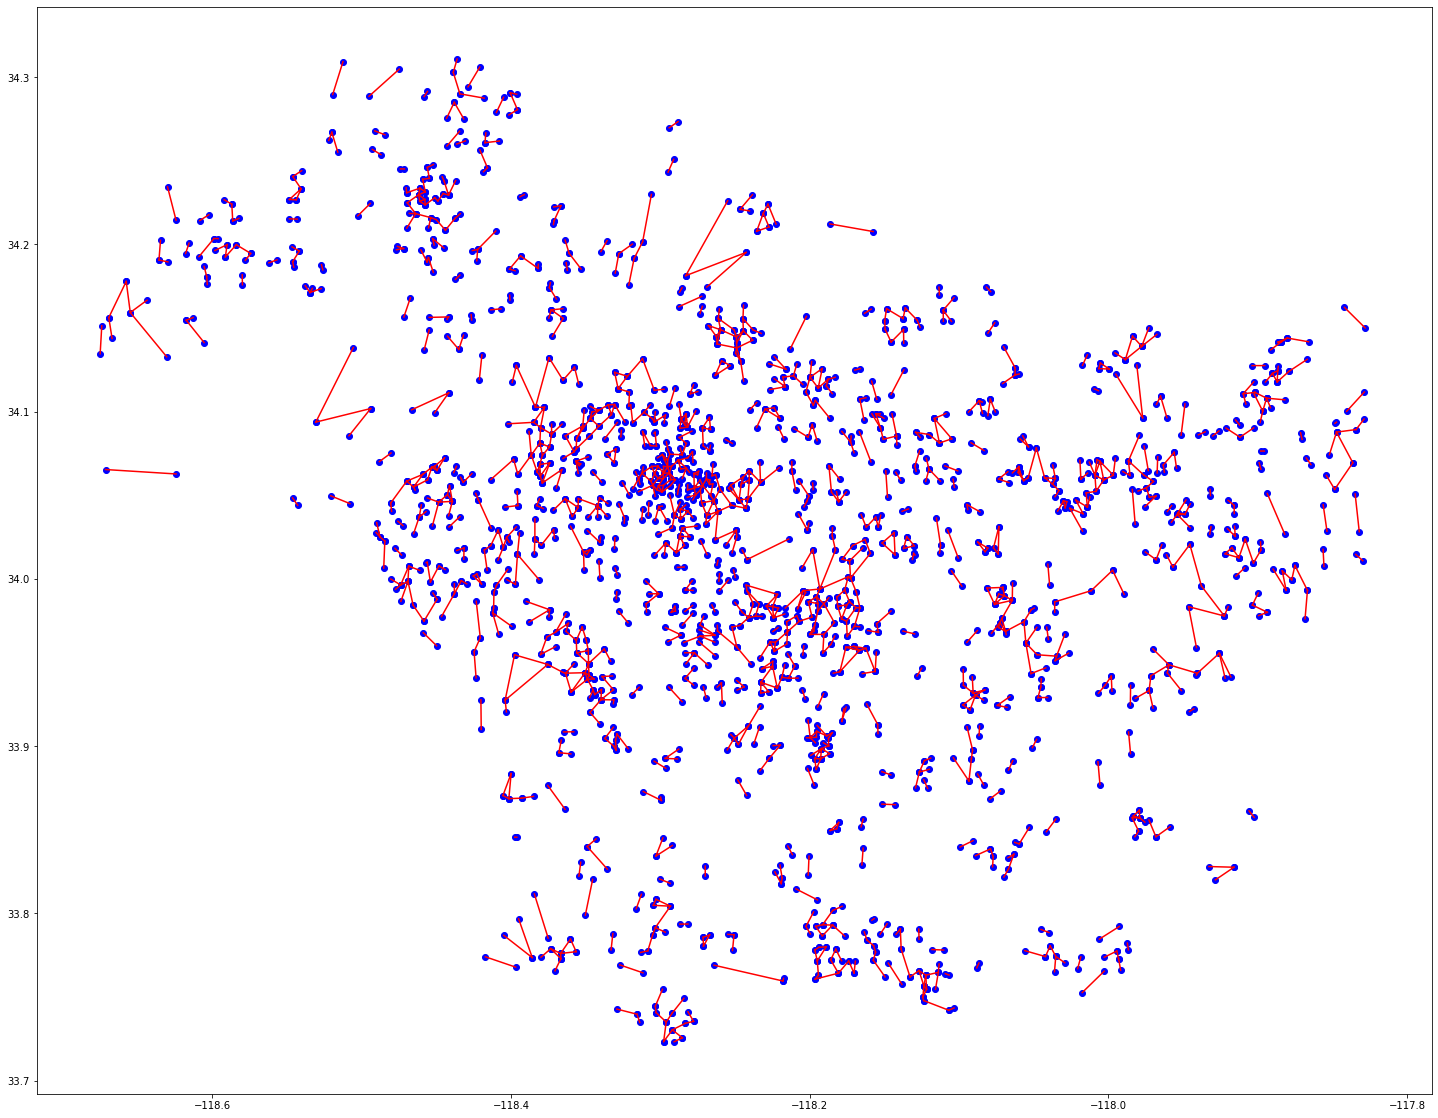

In [90]:
plt.figure(figsize=(25,20))
for i in tri_g16.keys():
    end1=i[0]
    end2=i[1]
    x=[]
    y=[]
    x.append(location_dict[str(end1)]['mean_coord'][0])
    x.append(location_dict[str(end2)]['mean_coord'][0])
    y.append(location_dict[str(end1)]['mean_coord'][1])
    y.append(location_dict[str(end2)]['mean_coord'][1])
    plt.plot(x,y,color='r')
    plt.scatter(x,y,color='b')
    print(x[0],y[0],x[1],y[1])

In [70]:
#get ratio list
ratio=[]
for key in gcc_g.keys():
    location1=location_dict[str(key[0])]['mean_coord']
    location2=location_dict[str(key[1])]['mean_coord']
    p_distance=69*np.sqrt((location1[0]-location2[0])**2+(location1[1]-location2[1])**2)
    travel_time=get_travel_time(key[0],key[1],gcc_g)
    ratio_sub=travel_time/p_distance
    ratio.append(ratio_sub)

c:\users\kingf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [77]:
for i in range(len(ratio)):
    if ratio[i]==float('inf') or ratio[i]>500:
        ratio[i]=300

Text(0, 0.5, 'Count')

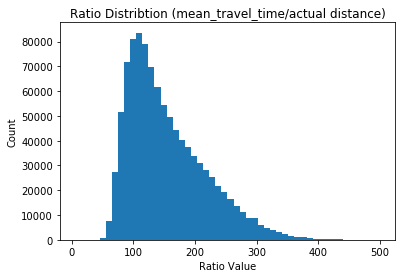

In [78]:
plt.hist(ratio,bins=50)
plt.title('Ratio Distribtion (mean_travel_time/actual distance)')
plt.xlabel('Ratio Value')
plt.ylabel('Count')

In [85]:
#since the ratio with the maximum count is around 100, we can assume 100 is the expected ratio after we build tunnel or high way
ratio_update=100
imp=[]
for i in tri_g16.keys():
    original_travel_time=get_travel_time(i[0],i[1],gcc_g)
    print('The original travel time from ',i[0],' to ',i[1],' is ',original_travel_time)
    location1=location_dict[str(i[0])]['mean_coord']
    location2=location_dict[str(i[1])]['mean_coord']
    p_distance=69*np.sqrt((location1[0]-location2[0])**2+(location1[1]-location2[1])**2)
    update_travel_time=p_distance*ratio_update
    print('The updated travel time from ',i[0],' to ',i[1],' is ',update_travel_time)
    print('The improvement is ',original_travel_time-update_travel_time)
    imp.append(original_travel_time-update_travel_time)

The original travel time from  2469  to  2470  is  1077.74
The updated travel time from  2469  to  2470  is  326.667222482792
The improvement is  751.072777517208
The original travel time from  148  to  2468  is  428.76
The updated travel time from  148  to  2468  is  115.78834187255256
The improvement is  312.9716581274474
The original travel time from  122  to  1691  is  893.52
The updated travel time from  122  to  1691  is  199.23687566364796
The improvement is  694.283124336352
The original travel time from  364  to  376  is  205.67
The updated travel time from  364  to  376  is  58.61236884712907
The improvement is  147.05763115287093
The original travel time from  434  to  1682  is  373.13
The updated travel time from  434  to  1682  is  92.83572894073161
The improvement is  280.2942710592684
The original travel time from  146  to  434  is  808.35
The updated travel time from  146  to  434  is  248.4766109584041
The improvement is  559.8733890415959
The original travel time from

The updated travel time from  253  to  508  is  112.35120534285512
The improvement is  258.8787946571449
The original travel time from  246  to  248  is  443.57
The updated travel time from  246  to  248  is  123.80057637354977
The improvement is  319.76942362645025
The original travel time from  1681  to  1951  is  69.69
The updated travel time from  1681  to  1951  is  4.8218755087236715
The improvement is  64.86812449127632
The original travel time from  1318  to  1327  is  405.82
The updated travel time from  1318  to  1327  is  69.39026857110801
The improvement is  336.42973142889196
The original travel time from  116  to  1318  is  168.76
The updated travel time from  116  to  1318  is  46.2248297240272
The improvement is  122.53517027597279
The original travel time from  1326  to  1327  is  92.44
The updated travel time from  1326  to  1327  is  29.60047616644455
The improvement is  62.83952383355545
The original travel time from  1148  to  2112  is  190.03
The updated travel ti

The original travel time from  441  to  2359  is  101.97
The updated travel time from  441  to  2359  is  32.64931492431711
The improvement is  69.32068507568289
The original travel time from  436  to  441  is  205.22
The updated travel time from  436  to  441  is  53.48467213453782
The improvement is  151.73532786546218
The original travel time from  441  to  442  is  142.8
The updated travel time from  441  to  442  is  29.87372603084199
The improvement is  112.92627396915802
The original travel time from  439  to  443  is  200.4
The updated travel time from  439  to  443  is  46.055431349152656
The improvement is  154.34456865084735
The original travel time from  443  to  445  is  179.75
The updated travel time from  443  to  445  is  54.856017335725205
The improvement is  124.8939826642748
The original travel time from  446  to  2361  is  147.91
The updated travel time from  446  to  2361  is  41.174032621382736
The improvement is  106.73596737861726
The original travel time from  

The updated travel time from  550  to  2600  is  89.69272186326076
The improvement is  315.48727813673923
The original travel time from  2140  to  2142  is  204.12
The updated travel time from  2140  to  2142  is  61.8115897490308
The improvement is  142.3084102509692
The original travel time from  694  to  2476  is  163.84
The updated travel time from  694  to  2476  is  18.196345584425103
The improvement is  145.6436544155749
The original travel time from  527  to  528  is  242.06
The updated travel time from  527  to  528  is  74.44872138292874
The improvement is  167.61127861707126
The original travel time from  452  to  1724  is  138.66
The updated travel time from  452  to  1724  is  44.67437473033996
The improvement is  93.98562526966003
The original travel time from  452  to  1725  is  124.64
The updated travel time from  452  to  1725  is  33.67028925876928
The improvement is  90.96971074123073
The original travel time from  82  to  452  is  343.51
The updated travel time from

The improvement is  255.31350951396732
The original travel time from  1743  to  1769  is  431.9
The updated travel time from  1743  to  1769  is  114.5420508691346
The improvement is  317.3579491308654
The original travel time from  1051  to  1052  is  197.62
The updated travel time from  1051  to  1052  is  65.09057474855321
The improvement is  132.5294252514468
The original travel time from  1050  to  1052  is  271.08
The updated travel time from  1050  to  1052  is  66.6638999971745
The improvement is  204.4161000028255
The original travel time from  1052  to  1057  is  179.55
The updated travel time from  1052  to  1057  is  58.51857835071939
The improvement is  121.03142164928062
The original travel time from  1072  to  1074  is  262.54
The updated travel time from  1072  to  1074  is  72.98616976055746
The improvement is  189.55383023944256
The original travel time from  1071  to  1072  is  203.0
The updated travel time from  1071  to  1072  is  61.78881483539818
The improvement 

Text(0, 0.5, 'Count')

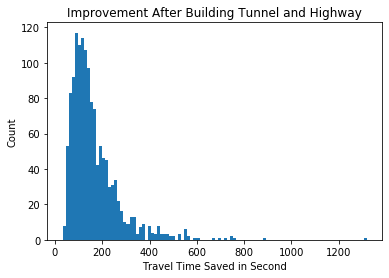

In [89]:
plt.hist(imp,bins=100)
plt.title('Improvement After Building Tunnel and Highway')
plt.xlabel('Travel Time Saved in Second')
plt.ylabel('Count')